<a href="https://colab.research.google.com/github/alibpowell/project1/blob/main/01_Student_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - K-Means Clustering

Due Friday February 6th at 11:59pm

**Chat GPT Policy:** This assignment will be worked on in groups of 3 (assigned randomly) and chat gpt can be used for "small code help" such as if you forget syntax or numpy function names, etc. but not for larger prortions (i.e. don't copy the questions into chat gpt)

-- **Insert First and Last Name** -- Ali Powell (ndj3mw), Laine Goldmacher (put7my), and Rashi Adhikari

-- **Please Type the Honor Pledge** -- (points will be deducted if not)

On my honor as a student, I have neither given nor received unauthorized aid on this assignment/examination./project.

# Overview of K-Means Clustering

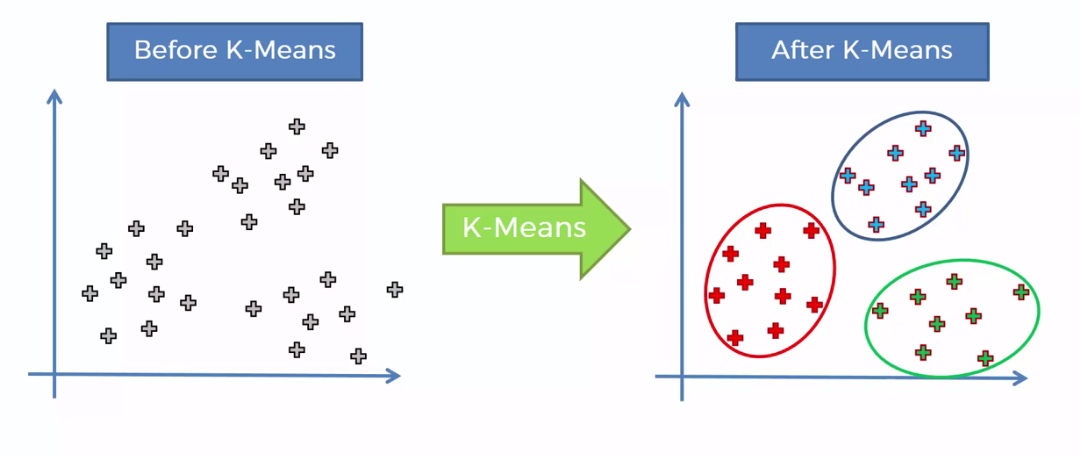

### The general steps in the K-means clustering algorithm are:
1. Choose the number of clusters: Decide on the value of \(k\), which is the number of clusters you want to create. K-means is an unsuperised learning method and in this example k is given.
2. Initialize centroids: Assign each data point randomly to a cluster, then compute each centroid (mean of cluster)
3. Calculate distances: For each data point, calculate the distance between it and each centroid.
4. Assign data points to clusters: Assign each data point to the cluster with the closest centroid.
5. Recalculate centroids: Find the new location of each centroid by calculating the mean of all the data points in its cluster.
6. Repeat: Repeat steps 3–5 until the centroids stop changing.      

### Further Explaination:
The K-means clustering algorithm is an iterative process that continues until the model stops improving. The algorithm outputs the final cluster centroids and the assignment of each data point to a cluster once convergence is achieved.            To determine the optimal number of clusters, you can use the elbow method. This method plots the mean distance between data points and centroids against a range of \(k\) values. The "elbow point" is where the rate of decrease in distance shifts, and this point usually represents the ideal \(k\).

## Cost function (Sum of Squared Distances)

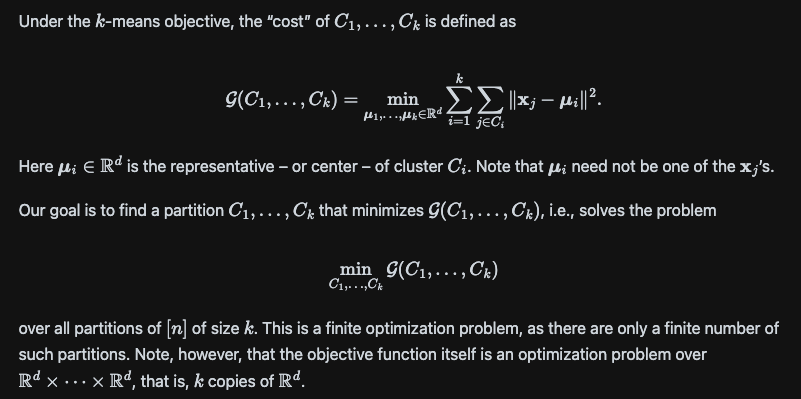

In [1]:
# Install packages
!pip install ucimlrepo


[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# Load packages
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import seaborn as sns

# Data and Exploratory Data Analyis (EDA)

**Goal:** Cluster The Presence of Heart Disease in Patients

Source: https://archive.ics.uci.edu/dataset/45/heart+disease

Labels: 0 (no presence) to 4

**Clusters:** k = 5

In [3]:
# Fetch Dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes - split into data and labels)
X = heart_disease.data.features
y = heart_disease.data.targets

# Metadata
print(heart_disease.metadata)

# Variable Information

print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
# View Snapshot of Data
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


### 1. Are there any missing data? Check for nan values. If there are any missing data, remove them.

In [5]:
# Check for missing data

print(X.isna().any())
print(X.isna().sum())




age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
dtype: bool
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


In [6]:
# Remove missing data

X = X.dropna(subset=['ca', 'thal'])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


### 1.5 Remove Binary Columns (Keep only the continuous columns)

In [7]:
# Keep only continuous columns
X = X[['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach',
       'oldpeak', 'slope', 'ca', 'thal']]
X.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,63,1,145,233,2,150,2.3,3,0.0,6.0
1,67,4,160,286,2,108,1.5,2,3.0,3.0
2,67,4,120,229,2,129,2.6,2,2.0,7.0
3,37,3,130,250,0,187,3.5,3,0.0,3.0
4,41,2,130,204,2,172,1.4,1,0.0,3.0


### 2. Turn data into a numpy array

Why do we turn our data into a numpy array?
- Numpy arrays are more efficient for numerical computations.
- Numpy provides a wide range of mathematical functions that can be applied directly to arrays

In [8]:
# Turn data into a numpy array

X = X.to_numpy()

### 3. How many patients are included in the dataset? (assume each line is a unique patient)

In [9]:
# How many patients are included in the dataset? (assume each line is a unique patient)

len(X)

# there seems to be 297 patients in the dataset

297

### 4. What dimension is our dataset in? (how many columns are there)

Why is it important to know the dimensions of our dataset?
  - The number of columns (or features/variables) is significant because each column represents a dimension of the data, which directly impacts how distances are calculated and how the clusters are ultimately formed and interpreted

In [10]:
# What dimension is our dataset in? (how many columns are there)

print(X.shape)

# there are 10 columns and 297 rows, so the dataset is 297 x 10, making it 10 dimensions

(297, 10)


### 5. How many unique label categories are there and what are they? (show with code)

Why is it important to know the unique label categories in a dataset?
- Understanding the unique label categories helps in assessing the distribution of classes within the dataset, which is crucial for tasks such as classification and clustering. It also aids in identifying potential class imbalances that may affect model performance.  

In [11]:
# How many unique label categories are there and what are they? (show with code)

import numpy as np

for i in range(X.shape[1]):
    col = X[:, i]
    classes, counts = np.unique(col, return_counts=True)

    print(f"--- Column {i+1} Analysis ---")
    print(f"Unique Categories ({len(classes)}): {classes}")
    print(f"Distribution: {dict(zip(classes, counts))}\n")

--- Column 1 Analysis ---
Unique Categories (41): [29. 34. 35. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.
 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69.
 70. 71. 74. 76. 77.]
Distribution: {np.float64(29.0): np.int64(1), np.float64(34.0): np.int64(2), np.float64(35.0): np.int64(4), np.float64(37.0): np.int64(2), np.float64(38.0): np.int64(1), np.float64(39.0): np.int64(4), np.float64(40.0): np.int64(3), np.float64(41.0): np.int64(10), np.float64(42.0): np.int64(8), np.float64(43.0): np.int64(7), np.float64(44.0): np.int64(11), np.float64(45.0): np.int64(8), np.float64(46.0): np.int64(7), np.float64(47.0): np.int64(5), np.float64(48.0): np.int64(7), np.float64(49.0): np.int64(5), np.float64(50.0): np.int64(7), np.float64(51.0): np.int64(12), np.float64(52.0): np.int64(11), np.float64(53.0): np.int64(7), np.float64(54.0): np.int64(16), np.float64(55.0): np.int64(8), np.float64(56.0): np.int64(11), np.float64(57.0): np.int64(17), np.float64(58.0)

### 6. In *k*-Means clustering, what does *k* represent? Is this a supervised or unsupervised classification method? (You can answer in markdown or just type in as a python comment)

In [12]:
# What is k? Will this be a supervised or unsupervised method?
# k represents the number of clusters we are trying to create
# k-Means is an unsupervised classification method because it focuses on unlabeled, unstructured data sets without human intervention to identify hidden patterns, similarities, and anomalies.


### 7. Should we standardize the data? If so, explain why and standardize the data. If not, explain why not.(Hint: To standardize, you must first calculate the mean and standard deviation of each column)

Note: for this question you will comment the answer in python code and additionally provide the code.

In [13]:
# Standardize the data and explain which method you chose and why this needs to be done (hint - compute the mean and standared deviation first)
# We should standardize the data because k-Means is a distance-based algorithm.
# It calculates the Euclidean distance between points to determine which cluster to put them in.
# If one feature has a much larger range than another, it will dominate the distance calculation.

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
X_standardized = (X - means) / stds

print(X_standardized)

[[ 0.93618065 -2.24062879  0.75038004 ...  2.26414539 -0.72197605
   0.65587737]
 [ 1.3789285   0.87388018  1.59626645 ...  0.6437811   2.47842525
  -0.89422007]
 [ 1.3789285   0.87388018 -0.65943064 ...  0.6437811   1.41162482
   1.17257652]
 ...
 [ 1.48961547  0.87388018  0.69398761 ...  0.6437811   1.41162482
   1.17257652]
 [ 0.27205887  0.87388018 -0.09550637 ...  0.6437811   0.34482438
   1.17257652]
 [ 0.27205887 -1.20245913 -0.09550637 ...  0.6437811   0.34482438
  -0.89422007]]


# Starter Code (Lloyd's Algorithm)

You will be using the code provided that we discussed in class as a start for this project. Please annotate the code in a way that shows you understand the purpose of each line/piece of the code and relate it to equations/math we learned in class. **<- This is very important.** An example annotation is shown below for a function that calcluates the l2 norm of two vectors (this code is for example only, you will not need it for the project).

In [14]:
def l2_norm(v1, v2):
    """
    Calculates the L2 norm (Euclidean distance) between two vectors.

    Parameters:
        v1 (list or numpy.ndarray): The first vector.
        v2 (list or numpy.ndarray): The second vector.

    Returns:
        float: The L2 norm of the two vectors.
    """

    # Convert vectors to numpy arrays if they aren't already
    v1 = np.array(v1)
    v2 = np.array(v2)

    # Check if vectors have the same length
    if len(v1) != len(v2):
        raise ValueError("Vectors must have the same length.")

    # Calculate the element-wise squared difference
    diff_squared = (v1 - v2) ** 2

    # Sum the squared differences
    sum_of_squares = np.sum(diff_squared)

    # Return the square root of the sum
    return np.sqrt(sum_of_squares)

In [15]:
def opt_reps(X, k, assign): # Takes us from clusters to centroids
    (n, d) = X.shape # n = number of data points, d = number of features
    reps = np.zeros((k, d)) # Initialize a matrix for k centroids, each with d dimensions
    for i in range(k):
        in_i = [j for j in range(n) if assign[j] == i] # Identifies which cluster C_j each point x_i is in
        reps[i,:] = np.sum(X[in_i,:],axis=0) / len(in_i) # Calculates the mean of each cluster(vector sum / count), finding its centroid and assigning it to the cluster
    return reps

def opt_clust(X, k, reps): # Takes us from centroids to clusters
    (n, d) = X.shape # n = number of data points, d = number of features
    dist = np.zeros(n) # Stores the distance of each point to its closest centroid
    assign = np.zeros(n, dtype=int) # Array to hold the index (0 to k-1) of the closest cluster
    for j in range(n): # Calculate L2 Norm ||x_j - mu_i|| for every centroid i
        dist_to_i = np.array([LA.norm(X[j,:] - reps[i,:]) for i in range(k)]) # Finds Euclidean between xi and muj: sqrt(sum((x - mu)^2))
        assign[j] = np.argmin(dist_to_i) # Selects the index i that resulted in the smallest distance
        dist[j] = dist_to_i[assign[j]] # Stores the distance value for the cost function calculation
    G = np.sum(dist ** 2) # sum of squared distances - similar to inertia
    print(G) # Prints result of cost function calculation
    return assign

def kmeans(rng, X, k, maxiter=5): # Puts it all together by repeating the two steps above until convergence or maxiter reached
  (n, d) = X.shape # n = number of data points, d = number of features
  assign = rng.integers(0,k,n) # Provides the initial (random) state for the first opt_reps call
  reps = np.zeros((k, d), dtype=int) # Initialize a matrix for k centroids, each with d dimensions
  for iter in range(maxiter): # Repeats the process of calculating centroids and clusters until maxiter reached
      reps = opt_reps(X, k, assign) # Calculates new centroids based on current assignment
      assign = opt_clust(X, k, reps) # Re-assigns points to the nearest newly calculated centroid, creating new clusters
  return assign # Returns the final clusters



# Your Turn

### 8. Use the kmeans and opt_reps functions to obtain the centers of each of the 5 clusters.

In [16]:
# hint: you need to create a random number generator as an input to kmeans (rng)
# define a seed and random number generator for the implementation input
seed = 123
rng = np.random.default_rng(seed)

# Use the kmeans and opt_reps functions to obtain the centers of each of the 5 clusters
assign = kmeans(rng, X_standardized, 5)
reps = opt_reps(X_standardized, 5, assign)
print(reps)

2675.2527313483515
2072.5547546767757
2005.425108282781
1991.9220833848603
1986.7417793071547
[[-0.81562503 -0.41345019 -0.42183055 -0.21300022 -0.62754345  0.73006772
  -0.59632992 -0.69572005 -0.50861596 -0.89422007]
 [ 0.65443201  0.18176708  0.11126587 -0.00557816 -0.33221293  0.33107114
  -0.31062465 -0.58376761  1.31464296  0.51495942]
 [ 0.38274583 -0.33975477  0.19598688  0.26457997  0.79749247  0.08575565
  -0.36954044  0.05040826 -0.40644353 -0.65406413]
 [ 0.58895716  0.64633615  0.37958052  0.20146517  0.2792279  -1.01306205
   1.11720993  0.82135527  0.7247807   0.74789228]
 [-0.67984902  0.04334446 -0.30353176 -0.38517866 -0.42170703  0.04854338
  -0.00763547  0.17567586 -0.65085602  0.93145025]]


### 9. Explain the output you received. What are the dimensions of the output and why? What do the values represent? Include your answer using markdown in this text cell.

The output received is a 2D matrix (NumPy array) with the dimensions $(k, d)$, where:

$k$ (Rows) = 5: This represents the number of clusters we requested. Each row corresponds to a single cluster center (centroid 1 through centroid 5).

$d$ (Columns) = 10: This matches the number of features (columns) in the original input $X$.

These are the dimensions because in k-Means, a center must exist in the same mathematical space as the data points themselves so that distances can be calculated.

Since the data points are $10$-dimensional vectors, their average (the centroid) must also be a $10$-dimensional vector. Therefore, we need one $10$-dimensional vector for each of the $5$ clusters.

Each value in the matrix represents the mean feature value for all data points assigned to that cluster. If row $i$ is the center for Cluster $i$, then the value at reps[$i$, $j$] is the arithmetic mean of feature $j$ for every point belonging to Cluster $i$.

### 10. Plot your clusters in 2D. Color the points according to what cluster they are assigned to. You can use any two columns for the x and y axes of the plots.

2686.109383844056
2056.11839807677
1995.5619949856825
1968.2589053665467
1957.349191525752


/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


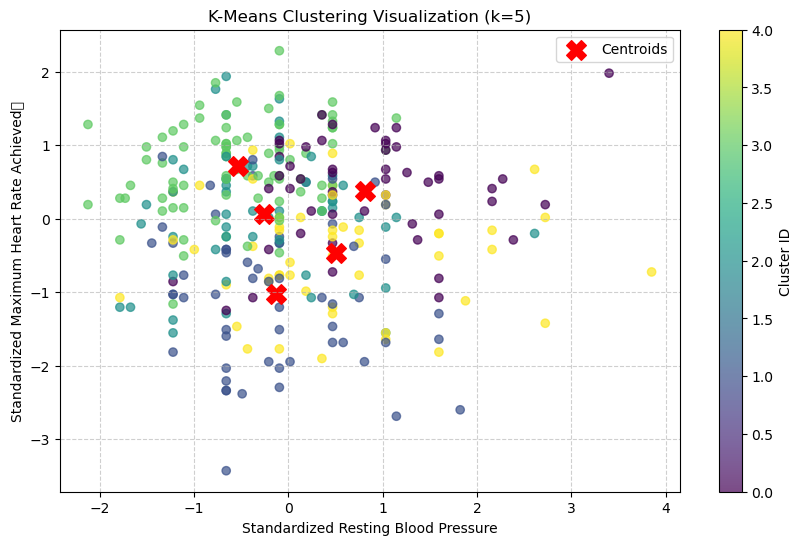

In [17]:
# Plot your clusters (color coded) in 2D (Can choose any two columns)
final_assignments = kmeans(rng, X_standardized, 5)
final_centers = opt_reps(X_standardized, 5, final_assignments)
x_axis = X_standardized[:, 2]
y_axis = X_standardized[:, 5]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_axis, y_axis, c=final_assignments, cmap='viridis', alpha=0.7)
plt.scatter(final_centers[:, 2], final_centers[:, 5], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering Visualization (k=5)')
plt.xlabel('Standardized Resting Blood Pressure')
plt.ylabel('Standardized Maximum Heart Rate Achieved	')
plt.colorbar(scatter, label='Cluster ID')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 11. Select 4 variables from the data set. Create a plot that shows all of your selected variables on the x-axis and the y-axis. Color the points according to the assigned cluster. (Hint: Review the final plot Section 1.1 of the Mathematical Methods in Data Science textbook)

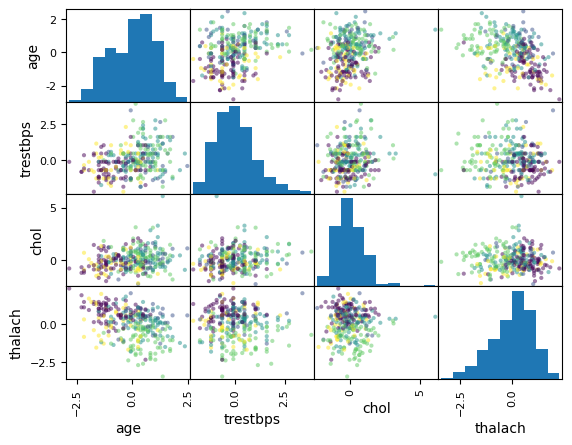

In [28]:
from pandas.plotting import scatter_matrix

# select 4 variables
cols = [0, 2, 3, 5]
col_names = ['age', 'trestbps', 'chol', 'thalach']  
df4 = pd.DataFrame(X_standardized[:, cols], columns=col_names)

# scatterplot matrix colored by cluster
scatter_matrix(df4, c=assign,cmap='viridis')
plt.show()

### 12. Experiment with your choice of k (ex. try k = 2). What do you notice and how does it tie into our data (presence of heart disease)?

In [30]:
# Experiment with your choice of k (try k = 2). What do you notice and how does it tie into our data (presence of heart disease)?

''' When using a smaller value of k, the clusters are more pronounced and overlap more than when k was larger. Instead of forming 
separate groups, many points seem to overlap with different features. This suggests that the data doesn't just split into two binary groups. 
This shows that using only two clusters oversimplifies the presence of great disease or not, as there may be different variations between
patients that are not accounted for.'''

" When using a smaller value of k, the clusters are more pronounced and overlap more than when k was larger. Instead of forming \nseparate groups, many points seem to overlap with different features. This suggests that the data doesn't just split into two binary groups. \nThis shows that using only two clusters oversimplifies the presence of heart disease or not, as there may be different variations between\npatients that are not accounted for."

### 13.  An elbow plot is a tool to subjectively identify the best choise of *k* using the *k*-means Clustering cost function. Reference Lab2 for additional details on what an elbow plot is and looks like. Create an Elbow Plot and choose the best value of *k* for our data set. You will need to adjust the code given so that the function(s) return the sum of squared distances along with the cluster assignments (aka the variable "assign"). This will allow you to plot the *k* on the x-axis and the sum of squared distances on the y-axis as you iterate through each value of *k*. Test $1 \leq $ *k* $\leq 10$.

In [23]:
def opt_clust(X, k, reps):
    (n, d) = X.shape
    dist = np.zeros(n)
    assign = np.zeros(n, dtype=int)
    for j in range(n):
        dist_to_i = np.array([LA.norm(X[j,:] - reps[i,:]) for i in range(k)])
        assign[j] = np.argmin(dist_to_i)
        dist[j] = dist_to_i[assign[j]]
    G = np.sum(dist ** 2)
    return assign, G

def kmeans(rng, X, k, maxiter=5):
    (n, d) = X.shape
    assign = rng.integers(0, k, n)
    reps = np.zeros((k, d))
    for iter in range(maxiter):
        reps = opt_reps(X, k, assign)
        assign, G = opt_clust(X, k, reps)
    return assign, G

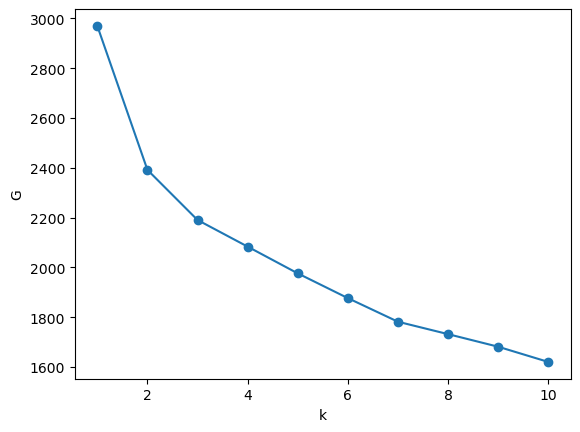

In [25]:
# Create an Elbow Plot (k on the x axis and cost function on the y axis) and choose the best value of k
# You will need to adjust the code given so that the function(s) return the sum of squared distances along with the cluster assignments (aka the variable "assign")
# This will allow you to plot the k on the x axis and the sum of squared distances on the y axis as you iterate through each value of k
# Test k=1 though k = 10 (inclusive)

ks = range(1, 11)
costs = []
seed = 123
for k in ks:
    rng = np.random.default_rng(seed)     # reset so runs are comparable
    assign_k, G = kmeans(rng, X_standardized, k, maxiter=10)
    costs.append(G)

plt.plot(list(ks), costs, marker='o')
plt.xlabel("k")
plt.ylabel("G")
plt.show()

#The best value of k is 3 as it is the smallest number with the greatest distance jump between two k values. 

### 14.  The starter code does not output a cost function that penalizes for larger values of *k*. Why is that an issue? If *k* was equal to our number of data points would that tell us anything? How could we adjust the code to ensure our optimal *k* value is not too large?

In [29]:
# The starter code does not output a cost function that penalizes for larger values of k.
# Why is that an issue? If k was equal to our number of data points would that tell us anything?
# How could we adjust the code to ensure our optimal k value is not too large?

'''The starter code doesn't produce a cost function that penalizes a larger value of k because the k-means cost function is equal 
to the sum of the squares of all values and will always decrease as k increases. Adding more clusters and centroids reduces the 
distance each point is from a centroid and therefore reduces the distance between the point and the centroid. This is an issue as it leads to the
model underfitting the data and not gaining any meaningful insight from the data. If k was equal to the number of data points, then each 
data point would just be its own cluster, and the cost function would be zero. This would tell us nothing about the patterns in the dataset 
and whether clusters actually emerge in the data, since each point itself is a cluster. To ensure that the value of k is not too large, one 
could choose the smallest k value such that if another cluster is added, then there is not a significant enough change or "improvement." 
in the model. '''

'The starter code doesn\'t produce a cost function that penalizes a larger value of k because the k-means cost function is equal \nto the sum of the squares of all values and will always decrease as k increases. Adding more clusters and centroids reduces the \ndistance each point is from a centroid and therefore reduces the distance between the point and the centroid. This is an issue as it leads to the\nmodel overfitting the data and not gaining any meaningful insight from the data. If k was equal to the number of data points, then each \ndata point would just be its own cluster, and the cost function would be zero. This would tell us nothing about the patterns in the dataset \nand whether clusters actually emerge in the data, since each point itself is a cluster. To ensure that the value of k is not too large, one \ncould choose the smallest k value such that if another cluster is added, then there is not a significant enough change or "improvement." \nin the model. '